# <font color='orange'>SPAM SMS DETECTION using Naive Bayes classifier</font>

### by Hamza Thamlaoui


<a href="https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset" style="text-decoration: underline;"><strong>Click here to access the Data</strong></a>

In [192]:
# import necessary liabraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from wordcloud import WordCloud



In [194]:
#Load the Dataset
sms_data = pd.read_csv('spam.csv', sep=',', encoding='latin-1') 



In [196]:
columns_to_keep = ['v1', 'v2']
sms_data = sms_data[columns_to_keep]
sms_data.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [198]:
sms_data.shape

(5572, 2)

In [200]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


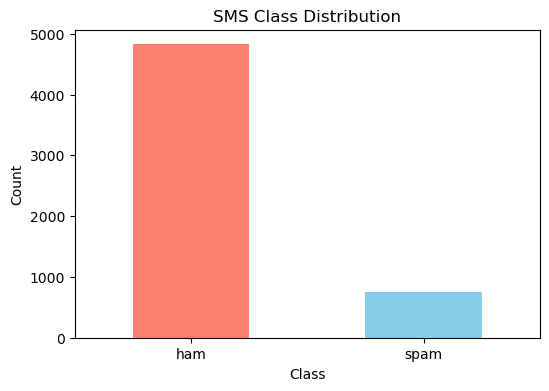

In [207]:

# Plotting class distribution
plt.figure(figsize=(6, 4))
sms_data['v1'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('SMS Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['ham', 'spam'], rotation=0)
plt.show()


In [209]:

#Preprocess the Data

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Remove punctuation and numbers
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back into text
    return ' '.join(tokens)

# Apply preprocessing to the 'v2' column
sms_data['clean_v2'] = sms_data['v2'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     v1                                                 v2  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                            clean_v2  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


In [211]:
# Display the first few rows of the DataFrame with cleaned text
print(sms_data.head())

     v1                                                 v2  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                            clean_v2  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


In [213]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X = tfidf_vectorizer.fit_transform(sms_data['clean_v2'])
y = sms_data['v1']  # Assuming 'label' column indicates spam or not

# Display the shape of the TF-IDF matrix
print(f"TF-IDF Matrix Shape: {X.shape}")


TF-IDF Matrix Shape: (5572, 5000)


In [215]:
!pip install wordcloud

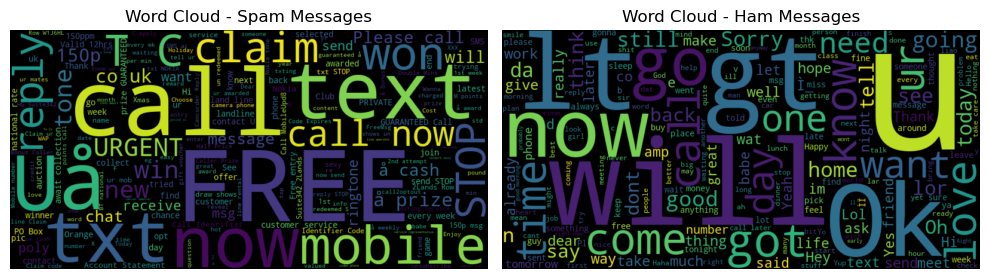

In [216]:
# Generate word cloud for spam messages

spam_text = ' '.join(sms_data[sms_data['v1'] == 'spam']['v2'])
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_text)

# Generate word cloud for ham messages
ham_text = ' '.join(sms_data[sms_data['v1'] == 'ham']['v2'])
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_text)

# Plot word clouds
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Spam Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Ham Messages')
plt.axis('off')

plt.tight_layout()
plt.show()


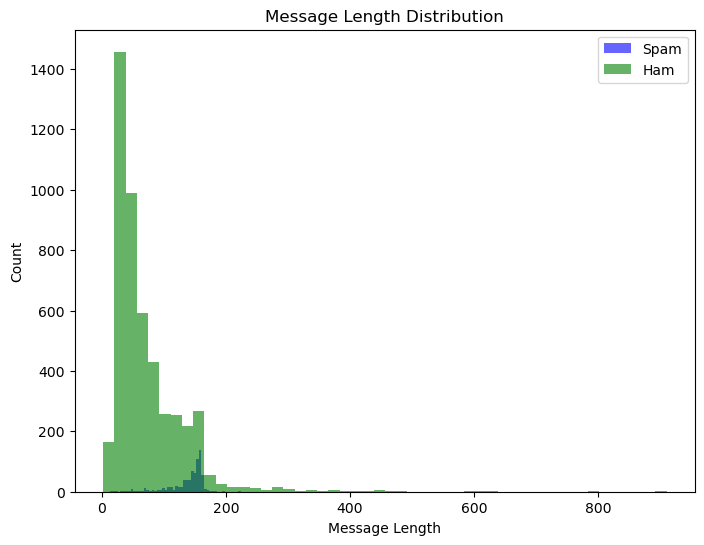

In [217]:
# Calculate message lengths
sms_data['message_length'] = sms_data['v2'].apply(len)

# Plot length distribution
plt.figure(figsize=(8, 6))
sms_data[sms_data['v1'] == 'spam']['message_length'].plot(kind='hist', bins=50, color='blue', label='Spam', alpha=0.6)
sms_data[sms_data['v1'] == 'ham']['message_length'].plot(kind='hist', bins=50, color='green', label='Ham', alpha=0.6)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend()
plt.show()


In [219]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [220]:

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [221]:
# Predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9730941704035875
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



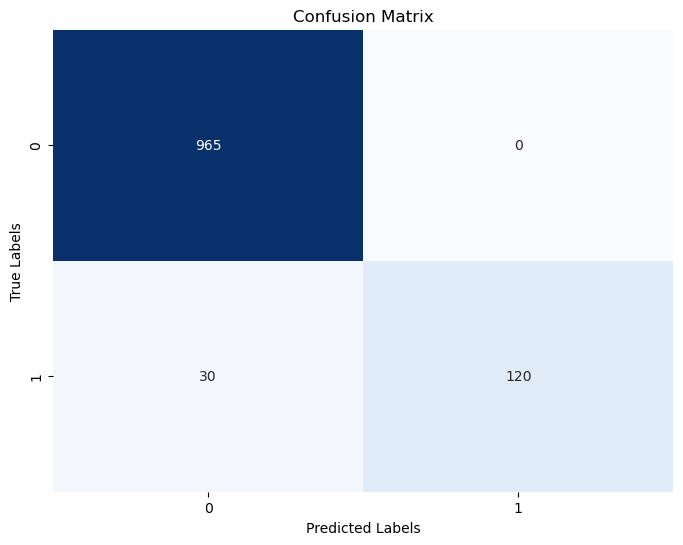

In [227]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
